# Global Income Group Classification based on Global Development Indicators

## Introduction
Economic development is a key driver of global well-being, but countries differ based on their levels of prosperity. Policymakers, politicians, financial institutions, and people interested in macroeconomics need to understand which countries are stagnating in lower income levels and which are progressing toward higher income categories. If we are able to identify patterns amongst countries, higher income countries can use these insights to direct aid, investment, and policy support toward lower income countries to promote global development and reduce inequality.

## The Data
The data used in this project is from [kaggle](https://www.kaggle.com/datasets/michaelmatta0/global-development-indicators-2000-2020?resource=download). This dataset includes global indicators from 2000 to 2020 with information covering economic, environmental, and social dimensions for over 190 countries (GDP, inflation rate, unemployment rate, CO2 emissions, renewable energy usage, life expectancy, school enrollment, healthcare capacity, and various development indices). In total, there are 47 key features in this dataset with over 5500 rows. 

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("Global_Development_Indicators_2000_2020.csv")
df

,year,country_code,country_name,region,income_group,currency_unit,gdp_usd,population,gdp_per_capita,inflation_rate,...,education_health_ratio,years_since_2000,years_since_century,is_pandemic_period,human_development_index,climate_vulnerability_index,digital_readiness_score,governance_quality_index,global_resilience_score,global_development_resilience_index
0,2000,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.839525e+11,398113044.0,713.245921,8.601485,...,NaN,0,0,0,0.075174,0.252217,0.012104,0.5,0.134733,12.302733
1,2001,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.588432e+11,408522129.0,633.608789,5.840354,...,NaN,1,1,0,0.094327,0.238820,0.016189,0.5,0.067481,13.257762
2,2002,AFE,Africa Eastern and Southern,NaN,NaN,NaN,2.648950e+11,419223717.0,631.870340,8.763752,...,NaN,2,2,0,0.114721,0.241795,0.020744,0.5,0.066218,13.962528
3,2003,AFE,Africa Eastern and Southern,NaN,NaN,NaN,3.526921e+11,430246635.0,819.743981,7.449700,...,NaN,3,3,0,0.135402,0.243486,0.027147,0.5,0.146931,15.163578
4,2004,AFE,Africa Eastern and Southern,NaN,NaN,NaN,4.388756e+11,441630149.0,993.762711,5.023421,...,NaN,4,4,0,0.155819,0.247210,0.035082,0.5,0.191834,16.111022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,2016,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,2.054868e+10,14030338.0,1464.588957,-1.543670,...,NaN,16,16,0,0.370373,0.179093,0.421578,0.5,0.375164,30.424141
5552,2017,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.758489e+10,14236599.0,1235.189032,0.893962,...,NaN,17,17,0,0.377994,0.177640,0.451950,0.5,0.365426,30.831303
5553,2018,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.811554e+10,14438812.0,1254.642265,10.618866,...,NaN,18,18,0,0.386741,0.183261,0.423016,0.5,0.343432,31.485225
5554,2019,ZWE,Zimbabwe,Sub-Saharan Africa,Lower middle income,Zimbabwean Dollar,1.928429e+10,14645473.0,1316.740657,255.304991,...,NaN,19,19,0,0.389866,0.386967,0.425841,0.5,0.513916,23.194054


In this dataset, our target value/column is **income_group**.

## Data Preprocessing

As you can see from the table above, there are many rows with null values. I will check the amount of null values for the entire dataset because missing data can lead to misleading results.

In [79]:
print(df.shape)
df.isna().sum()

(5556, 47)


year                                      0
country_code                              0
country_name                              0
region                                 1008
income_group                           1029
currency_unit                          1008
gdp_usd                                 224
population                                0
gdp_per_capita                          224
inflation_rate                          810
unemployment_rate                       630
fdi_pct_gdp                             545
co2_emissions_kt                       1022
energy_use_per_capita                  2621
renewable_energy_pct                    748
forest_area_pct                         113
electricity_access_pct                  401
life_expectancy                         600
child_mortality                         504
school_enrollment_secondary            1800
health_expenditure_pct_gdp              870
hospital_beds_per_1000                 2873
physicians_per_1000             

There is a ton of null values in this dataset. To continue, I need to decide which columns are viable to drop or if missing values should be filled in. 

### Dropping Columns / Rows

Since the target value is **income_group**, I need to remove rows where **income_group** is missing (I can't train and test without the labels).

In [80]:
df_dropped = df.dropna(subset=["income_group"])

Next, I can drop columns that don't help with prediction:

Identifier not a feature
* country_name
* country_code
* currency_unit
* region

I don't need to predict across time, these columns just add noise
* year 
* years_since_2000 
* years_since_century

Since GDP-related features are a sure-fire way of predicting a countries income group, I decided to remove these columns because it shows health, education, environment, and digital indicators can explain income groups beyond just "rich vs poor."
* gdp_usd
* gdp_per_capita
* calculated_gdp_per_capita
* real_economic_growth_indicator
* co2_intensity_per_million_gdp


In [81]:
cols_to_drop = [
    "country_name",
    "country_code",
    "currency_unit",
    "region",
    "year",
    "years_since_2000",
    "years_since_century",
    "gdp_usd",
    "gdp_per_capita",
    "calculated_gdp_per_capita",
    "real_economic_growth_indicator",
    "co2_intensity_per_million_gdp"
]

df_dropped = df_dropped.drop(columns=cols_to_drop)
print(df_dropped.shape)

(4527, 35)


Now that I have dropped all the necessary columns and rows, the data preprocessing step is done!

## Data Understanding and Visualization

To understand the data, I need to create visualizations (plot/graphs) that reveal the distribution of income groups and uncover patterns or trends that may influence a country’s classification.

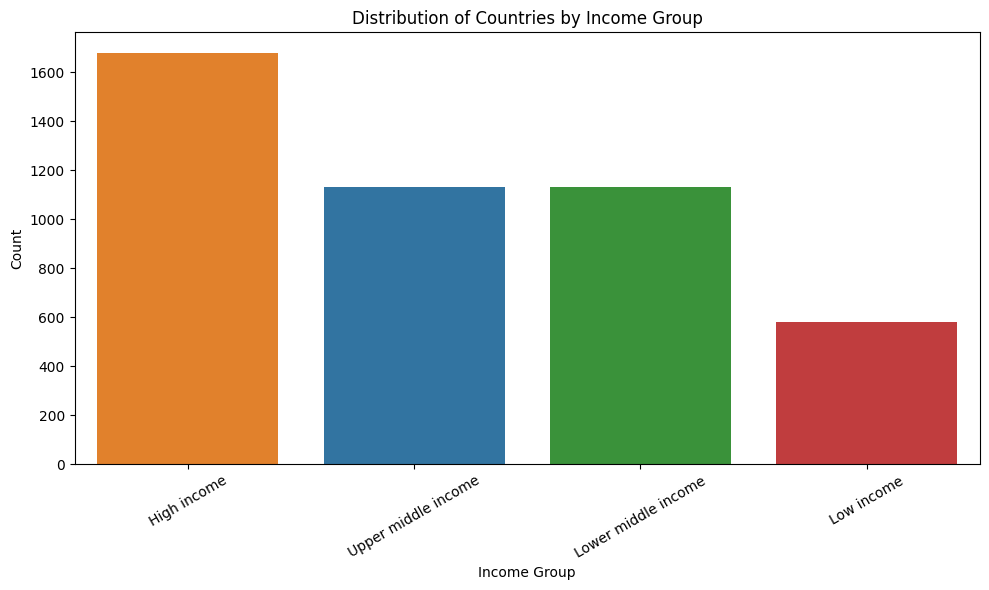

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_dropped,
    x="income_group",
    hue="income_group",
    order=df_dropped["income_group"].value_counts().index,
    
)
plt.title("Distribution of Countries by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

From this countplot, we can see that more than 1600 countries are classified as "High Income", making it the largest group. Both “Upper Middle Income” and “Lower Middle Income” categories have around 1,100 records each, while the “Low Income” category is the smallest group with about 600 records. This distribution shows a noticeable class imbalance, with high-income countries being overrepresented compared to low-income countries. Because of this imbalance, accuracy alone is not a reliable evaluation metric. A model can possibly achieve high accuracy by favoring the high income class, but it will preform poorly on the low income class. Therefore, I need to rely on metrics such as precision, F1 score, ROC-AUC score, and confusion matrices. 

Before I move on to preparing and creating my model, I want to look at a heatmap of correlations between the numeric features and the target feature. This will help with me identify which indicators are strongly associated with income groups. However, I first need to encode income_group into numeric values. 

In [83]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_dropped.copy()
income_order = {"Low income":0, "Lower middle income":1, "Upper middle income":2, "High income":3}
df_encoded["income_group_encoded"] = df_encoded["income_group"].map(income_order)

le = LabelEncoder()

df_encoded["income_group_encoded"] = le.fit_transform(df_encoded["income_group"])

By using label encoding, each income category will be mapped to an integer, which allows for correlation analysis and model training.

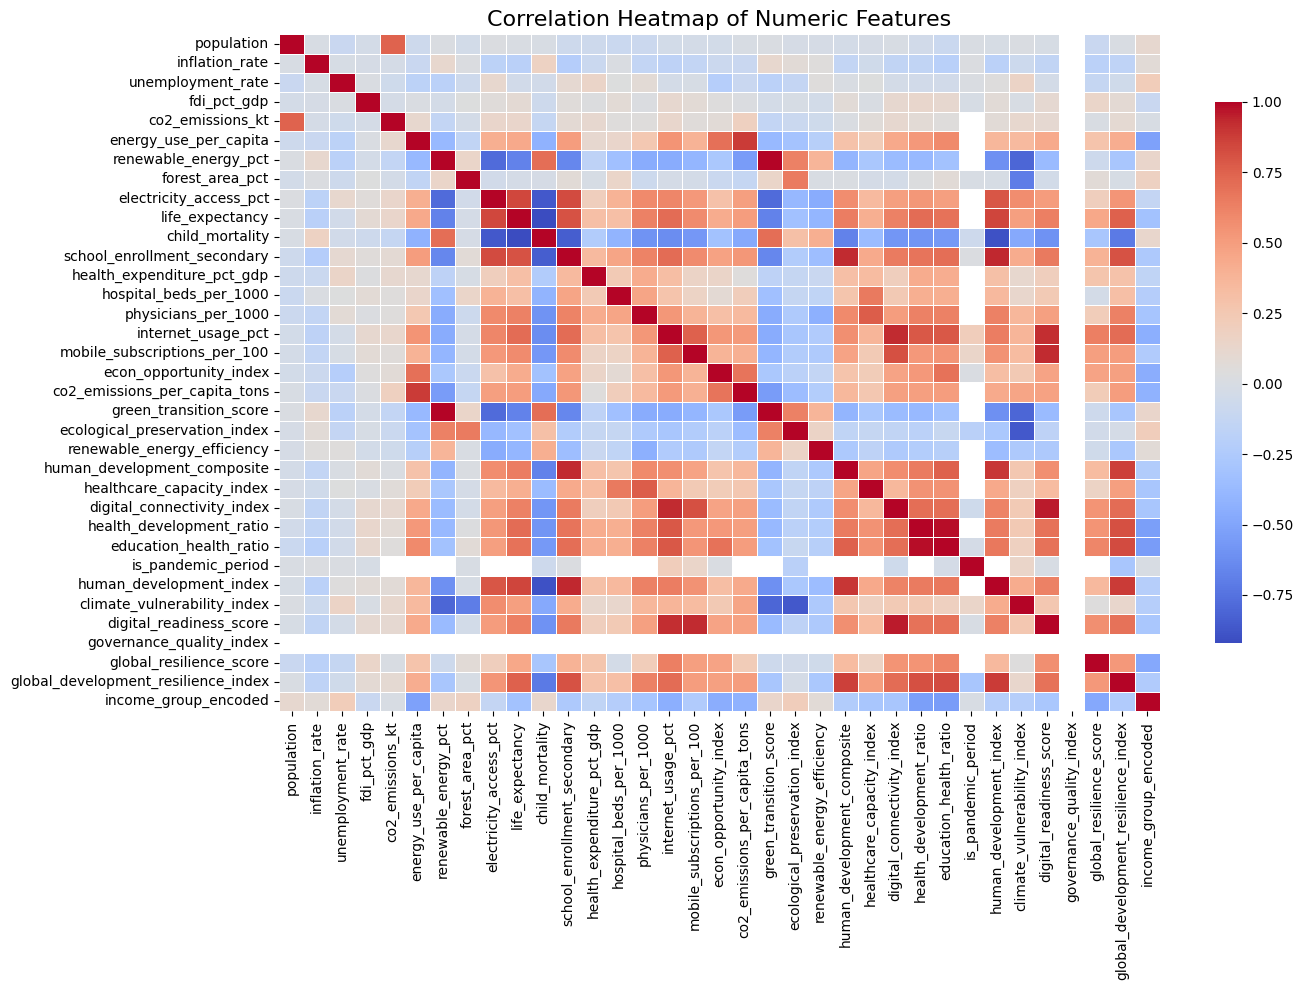

In [84]:
numeric_df = df_encoded.select_dtypes(include=["float64", "int64"])

corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=False,        # change to True if you want correlation values displayed
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

Lets understand this heatmap. In the context of this dataset and problem, red means that there is a strong positive correlation, while blue indicates that there is a strong negative correlation. Since we used a LabelEncoder, the numeric values assigned to the income groups are based on alphabetical order (for example, "High income" might be encoded as 0, "Low income" as 1, "Lower middle income" as 2, and "Upper middle income" as 3). This may seem non-intuitive, but the important point is that the heatmap still shows the strength of the relationship between features and income groups despite the colors.

With that being said, the heatmap shows us that life expectancy, internet usage, and school enrollment show strong associations, which makes sense as higher-income countries tend to have longer lifespans, improved digital connectivity, and greater access to education. On the other hand, features like child mortality are strongly negatively correlated, which also makes sense as it reflects that lower-income countries face higher mortality rates. 

## Modeling

Now that we have cleaned the data and explored some correlations using our data visualizations, we can start to build our model. For this project, I will use a Random Forest Model.

### Split Train / Test Data

To begin, I need to split my training and testing data. 

In [85]:
from sklearn.model_selection import train_test_split

X = df_dropped.drop(columns=["income_group"])
y = df_dropped["income_group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

We split our dataframe into X and y. X is the variable that holds our features, which in this case is our numerical indicators. y is the variable that holds our target value. This is the label that we want our model to classify each row into. Following that, we use scikit-learn's train_test_split function to split our data into 80% training and 20% testing. This means that the model is trained on the majority of data while leaving out 20% for evaluation. 

### Creating Pipelines

Next we need to create our preprocessing and Random Forest pipelines.

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

numeric_features = X_train.select_dtypes(include=["float64", "int64"]).columns

numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features)
])

rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

After the imports, I get all 34 of the numeric features and assign it to the variable numeric_features. You may be wondering why I didn't create a pipeline for categorical features. To answer that lets take another look at the date. 

In [87]:
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
print("Categorical features:", categorical_features)

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric features:", numeric_features)

Categorical features: []
Numeric features: ['population', 'inflation_rate', 'unemployment_rate', 'fdi_pct_gdp', 'co2_emissions_kt', 'energy_use_per_capita', 'renewable_energy_pct', 'forest_area_pct', 'electricity_access_pct', 'life_expectancy', 'child_mortality', 'school_enrollment_secondary', 'health_expenditure_pct_gdp', 'hospital_beds_per_1000', 'physicians_per_1000', 'internet_usage_pct', 'mobile_subscriptions_per_100', 'econ_opportunity_index', 'co2_emissions_per_capita_tons', 'green_transition_score', 'ecological_preservation_index', 'renewable_energy_efficiency', 'human_development_composite', 'healthcare_capacity_index', 'digital_connectivity_index', 'health_development_ratio', 'education_health_ratio', 'is_pandemic_period', 'human_development_index', 'climate_vulnerability_index', 'digital_readiness_score', 'governance_quality_index', 'global_resilience_score', 'global_development_resilience_index']


There are no categorical features! This is because in our preprocessing step, I dropped all other categorical features do to them not being useful to my model. Besides that, after creating the numeric_pipeline, I create the preprocessor, which applies the numeric transformations to all numeric features in the dataset. This makes sure that missing values are handled and that the features are standardized before being passed into the Random Forest model. Following that, I create the Random Forest pipeline with the preprocessor and classifier. 

### Training and Testing Random Forest

In [88]:
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)

These lines of code train the Random Forest pipeline on the training data. It then uses the trained pipeline to predict income group labels for the test data. The last line gets the probability estimates for each class instead of just the most likely label, which is needed for ROC AUC and Average Precision scores.

In [89]:
from sklearn.metrics import roc_auc_score, f1_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize

classes = rf_pipeline.classes_
y_test_bin = label_binarize(y_test, classes=classes)

roc_auc_macro = roc_auc_score(y_test_bin, y_pred_proba, average="macro", multi_class="ovr")
roc_auc_weighted = roc_auc_score(y_test_bin, y_pred_proba, average="weighted", multi_class="ovr")

f1_macro = f1_score(y_test, y_pred, average="macro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

ap_macro = average_precision_score(y_test_bin, y_pred_proba, average="macro")
ap_weighted = average_precision_score(y_test_bin, y_pred_proba, average="weighted")

cm = confusion_matrix(y_test, y_pred)

These are the final lines of code before we get to see how well the model did. Since our dataset provided us with multiple target classes (High income, Low income, Lower middle income, Upper middle income) we need to use metrics like ROC AUC, F1 Score, and Average Precision. These metrics are extended to the multi-class data by using the "macro" (treats all classes equally) and "micro" (accounts for class imbalance) averages. Finally a confusion matrix allows us to see a detailed view of how well the model distinguishes between the income groups.

## Evaluation

Now that the model is trained and tested, we can take a look at how well it performed.

In [90]:
print("ROC AUC (Macro):", roc_auc_macro)
print("ROC AUC (Weighted):", roc_auc_weighted)
print("F1 Score (Macro):", f1_macro)
print("F1 Score (Weighted):", f1_weighted)
print("Average Precision (Macro):", ap_macro)
print("Average Precision (Weighted):", ap_weighted)
print("\nConfusion Matrix:\n", cm)

ROC AUC (Macro): 0.9989734427846758
ROC AUC (Weighted): 0.9990047939371385
F1 Score (Macro): 0.9809090975966825
F1 Score (Weighted): 0.9812243252969461
Average Precision (Macro): 0.996876400338101
Average Precision (Weighted): 0.9971697057162963

Confusion Matrix:
 [[334   0   0   2]
 [  0 113   2   1]
 [  0   0 223   4]
 [  5   0   3 219]]


Wow! This model performed exceptionally well. The high ROC AUC and Average Precision scores show that the classifier is very good at distinguishing between the different income groups. The strong F1 scores indicate that the model balances precision and recall effectively, even across multiple classes. Finally, with the confusion matrix, we can see that very few misclassifications occurred, meaning the Random Forest model was able to capture the  relationships between development indicators and income groups.

## Storytelling

I gathered this data to examine how development indicators contribute to a nation’s economic classification. By focusing on non-GDP features, I was able to highlight whether social, environmental, and infrastructural factors can serve as predictors of prosperity and help explain why certain countries remain in lower categories while others progress toward higher income groups. From our model, I can confidently say that these features do have a connection to a countries economic income group.

## Impact

While this project builds a model to classify countries by their income group based on non-GDP features, it is important to consider the potential limitations of the dataset and model. Although there are various features, the dataset may not capture the full complexity of socio-economic development. Factors such as politics and culture are not represented but can significantly impact a country's prosperity. Furthermore, this analysis is limited to historical data from 2000-2020. The global economy is dynamic and much has changed since then. For example, this dataset does not take into consideration the effects of COVID-19, which had major social and economic impacts around the world. However, this model and dataset do give us valuable insights into the underlying factors that contribute to a country’s income classification.

## References

[Project Files](https://github.com/spham64/global_income_group_classification) (GitHub)

[Kaggle Dataset](https://www.kaggle.com/datasets/michaelmatta0/global-development-indicators-2000-2020?resource=download)

